<a href="https://colab.research.google.com/github/arifroska/PrakAPM/blob/main/ANN_SLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#import data
from google.colab import files
uploaded = files.upload()

Saving survey lung cancer.csv to survey lung cancer (1).csv


In [32]:
import io
import pandas as pd
import numpy as np  #import libraryu numpy
import matplotlib.pyplot as plt  #import library matplotlib

df = pd.read_csv(io.BytesIO(uploaded['survey lung cancer.csv']), encoding= 'latin-1')
df.head(n=10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


In [37]:
df.loc[df.SMOKING == '1'] = 0
df.loc[df.SMOKING == '2'] = 1

df.loc[df.FATIGUE == '1'] = 0
df.loc[df.FATIGUE == '2'] = 1

df.loc[df.LUNG_CANCER == 'NO'] = 0
df.loc[df.LUNG_CANCER == 'YES'] = 1

df[['SMOKING']] = df[['SMOKING']].astype(float)
df[['FATIGUE']] = df[['FATIGUE']].astype(float)

x = df[["SMOKING", "FATIGUE"]]
print(f'input : \n{x}') #menampilkan x
y = df["LUNG_CANCER"]
print(f'\ntarget : \n{y}') #menampilkan y

input : 
     SMOKING  FATIGUE
0        1.0      1.0
1        1.0      1.0
2        0.0      0.0
3        0.0      0.0
4        0.0      0.0
..       ...      ...
304      1.0      1.0
305      1.0      1.0
306      1.0      1.0
307      1.0      1.0
308      1.0      1.0

[309 rows x 2 columns]

target : 
0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: object


In [38]:
#Melakukan pembagian data training dan data test (training=70%, test=30%).
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [39]:
#Menentukan nilai bobot, bias, learning rate dan iterasi 
NUM_FEATURES = 2 #menentukan input koneksi pada neuron
NUM_ITER = 100 #menentukan jumlah iterasi
learning_rate = 0.1 #menentukan learning rate

W = np.zeros(NUM_FEATURES, np.float32) #menentukan weight
b = np.zeros(1, np.float32) #menentukan bias

In [40]:
for i in range(NUM_ITER):   #perulangan untuk melakukan training
    y_pred = np.dot(x, W) + b  #menentukan nilai y_pred
    
    y_pred[y_pred > 0] = 1  #menentukan nilai y_pred > 0
    y_pred[y_pred < 0] = 0  #menentukan nilai y_pred < 0
    
    err = y - y_pred  #menentukan nilai err
    if np.sum(err) == 0:  #perulangan untuk menghentikan program jika err = 0
        break
    
    delta_W = learning_rate * np.dot(np.transpose(x), err)  #menentukan nilai delta W
    delta_b = learning_rate * np.sum(err)  #menentukan nilai delta b
    W = W + delta_W  #menentukan nilai W
    b = b + delta_b  #menentukan nilai b
    print("Iterasi ke-" + str(i), err, W, b)  #menampilkan iterasi training

Iterasi ke-0 0      1.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
304    1.0
305    1.0
306    1.0
307    1.0
308    1.0
Name: LUNG_CANCER, Length: 309, dtype: object [27.0 27.0] [27.]
Iterasi ke-1 0       0
1       0
2      -1
3      -1
4      -1
       ..
304     0
305     0
306     0
307     0
308     0
Name: LUNG_CANCER, Length: 309, dtype: object [27.0 27.0] [23.1]
Iterasi ke-2 0       0
1       0
2      -1
3      -1
4      -1
       ..
304     0
305     0
306     0
307     0
308     0
Name: LUNG_CANCER, Length: 309, dtype: object [27.0 27.0] [19.2]
Iterasi ke-3 0       0
1       0
2      -1
3      -1
4      -1
       ..
304     0
305     0
306     0
307     0
308     0
Name: LUNG_CANCER, Length: 309, dtype: object [27.0 27.0] [15.300001]
Iterasi ke-4 0       0
1       0
2      -1
3      -1
4      -1
       ..
304     0
305     0
306     0
307     0
308     0
Name: LUNG_CANCER, Length: 309, dtype: object [27.0 27.0] [11.400002]
Iterasi ke-5 0       0
1       0
2      

W:[27.0 27.0]
b:[-0.29999876]
plot_y:[ 0.21111107 -1.18888893]


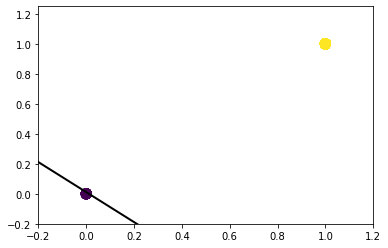

In [41]:
plot_x = np.array([np.min(x.iloc[:, 0] - 0.2), np.max(x.iloc[:, 1]+0.2)])  #menentukan nilai plot_x
plot_y = -1 / W[1] * (W[0] * plot_x + b)  #menentukan nilai plot_y
  
print('W:' + str(W))  #print nilai W
print('b:' + str(b))  #print nilai b
print('plot_y:' + str(plot_y))  #print nilai plot_y

plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, s=100, cmap='viridis')  #membuat diagram scatter
plt.plot(plot_x, plot_y, color='k', linewidth=2) #menentukan nilai plot
plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.25]); #menentukan nilai xlim dan ylim
plt.show()  #menampilkan diagram

In [45]:
# Menghitung akurasi prediksi menggunakan confusion matrix
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, train_size=0.70)

y_train=y_train.astype('int')

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))

[[ 6  0]
 [ 0 87]]


            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


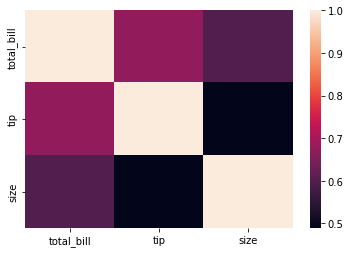

In [46]:
#Melakukan Visualisasi dengan Heatmap
import seaborn as sns
data = sns.load_dataset('tips')
data = data.corr()
print(data)
sns.heatmap(data)
plt.show()